Root Mean Squared Error: 13.11


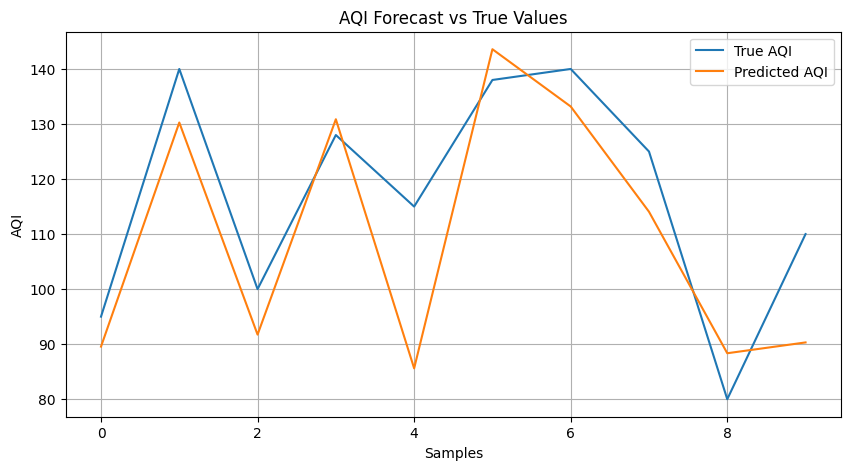

✅ Model saved as 'aqi_forecast_model.pkl'


In [5]:
# 📦 Imports
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt

# 📂 Load dataset
df = pd.read_csv('../data/sample_aqi.csv', parse_dates=['datetime'])

# 🧠 Feature Engineering
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

X = df[['hour', 'dayofweek']]
y = df['AQI']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Model Training
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

# 📉 Evaluation
predictions = model.predict(X_test)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Root Mean Squared Error: {rmse:.2f}")

# 📈 Optional: Plot predictions
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:30], label="True AQI")
plt.plot(predictions[:30], label="Predicted AQI")
plt.title("AQI Forecast vs True Values")
plt.xlabel("Samples")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()

# 💾 Save the model
joblib.dump(model, '../models/aqi_forecast_model.pkl')
print("✅ Model saved as 'aqi_forecast_model.pkl'")
